In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
data=np.loadtxt('data.csv',delimiter=',')
data.shape

(50, 2)

In [4]:
data[:5]

array([[1651.        ,  432.64521724],
       [1691.81632653,  454.93552962],
       [1732.63265306,  471.52524758],
       [1773.44897959,  482.50638875],
       [1814.26530612,  468.35788634]])

In [5]:
x=data[:,0].reshape(-1,1)
y=data[:,1].reshape(-1,1)
x.shape,y.shape

((50, 1), (50, 1))

Text(0.5, 1.0, 'Data')

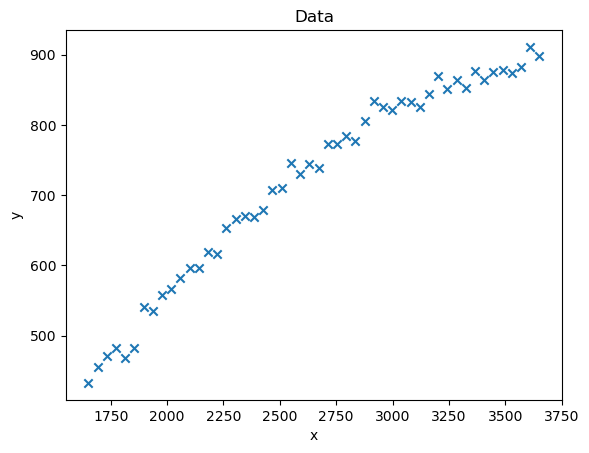

In [6]:
plt.scatter(x,y,marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')

In [7]:
#divide dataset by train - 60 % cv,test - 20%,20%

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.4)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5)
print('shape of x_train and y_train:',x_train.shape,y_train.shape)
print('shape of x_cv and y_cv:',x_cv.shape,y_cv.shape)
print('shape of x_test and y_Test:',x_test.shape,y_test.shape)

shape of x_train and y_train: (30, 1) (30, 1)
shape of x_cv and y_cv: (10, 1) (10, 1)
shape of x_test and y_Test: (10, 1) (10, 1)


In [10]:
#find best polynomial model with degrees from 1 to 8 using cross validation set

In [11]:
min_degree,max_degree=1,8
degrees=list(range(min_degree,max_degree+1))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse

In [13]:
#add polynomial features and then normalize

In [14]:
def transform_x(x,degree):
    poly=PolynomialFeatures(degree=degree,include_bias=False)
    x_mapped=poly.fit_transform(x)
    scaler=StandardScaler()
    x_mapped_scaled=scaler.fit_transform(x_mapped)
    return x_mapped_scaled

In [15]:
#transform and predict on polynomial model

In [16]:
def transform_and_predict(x,degree,model):
    x_mapped_scaled=transform_x(x,degree)
    y_pred=model.predict(x_mapped_scaled)
    return y_pred

In [17]:
#train polynomails with degrees from 1 to 8 on x_train
#evaluate train and cv mses
#choose best model by lowest cv error

In [18]:
x_train_mses=[]
x_cv_mses=[]
models=[]
for degree in degrees:
    x_train_mapped_scaled=transform_x(x_train,degree)
    x_cv_mapped_scaled=transform_x(x_cv,degree)
    
    model=LinearRegression()
    model.fit(x_train_mapped_scaled,y_train)
    models.append(model)
    
    y_pred_train=model.predict(x_train_mapped_scaled)
    x_train_mse=mse(y_train,y_pred_train)
    
    y_pred_cv=model.predict(x_cv_mapped_scaled)
    x_cv_mse=mse(y_cv,y_pred_cv)
    
    x_train_mses.append(x_train_mse)
    x_cv_mses.append(x_cv_mse)

In [19]:
#bias and variance tradeoff
#bias - high error on train and cv
#variance - low error on train and high error on cv

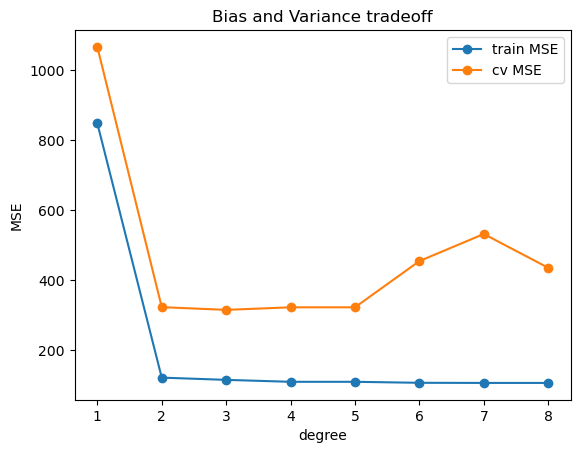

In [20]:
plt.plot(degrees,x_train_mses,marker='o',label='train MSE')
plt.plot(degrees,x_cv_mses,marker='o',label='cv MSE')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.title('Bias and Variance tradeoff')
plt.legend()

In [21]:
#plot x with y_true and y_pred

In [22]:
def plot_xy(x,y_true,y_pred,_xlabel,_ylabel,_title):
    plt.scatter(x,y_true,marker='x',label='actual target')
    plt.scatter(x,y_pred,marker='x',label='predicted target')
    plt.xlabel(_xlabel)
    plt.ylabel(_ylabel)
    plt.title(_title)
    plt.legend()

In [23]:
#choosing best model by lowest cv error and predict on test

best model with degree = 3 and lowest cv error = 314.61181569827795
train MSE = 114.31173696520798
cv MSE = 314.61181569827795
test MSE = 150.1469482749324


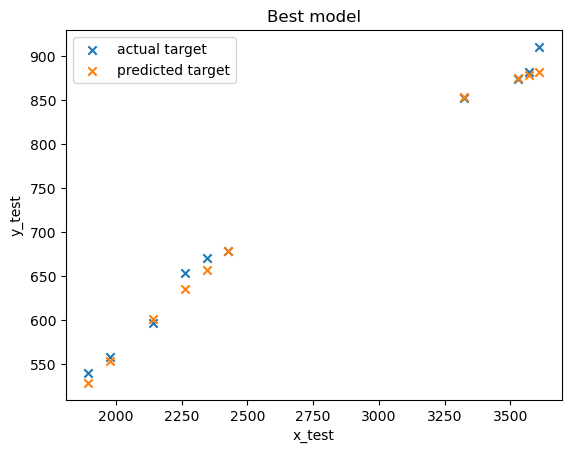

In [24]:
degree=np.argmin(x_cv_mses)+1
x_train_mse=x_train_mses[degree-1]
x_cv_mse=x_cv_mses[degree-1]
print(f'best model with degree = {degree} and lowest cv error = {x_cv_mse}')

model=models[degree-1]
y_pred=transform_and_predict(x_test,degree,model)
x_test_mse=mse(y_test,y_pred)

print(f'train MSE = {x_train_mse}')
print(f'cv MSE = {x_cv_mse}')
print(f'test MSE = {x_test_mse}')

plot_xy(x_test,y_test,y_pred,'x_test','y_test','Best model')

In [25]:
#choosing model with high bias problem using train set

High Bias model with degree = 1 : high train error = 848.5001338642185 and high cv error = 1067.010848402179


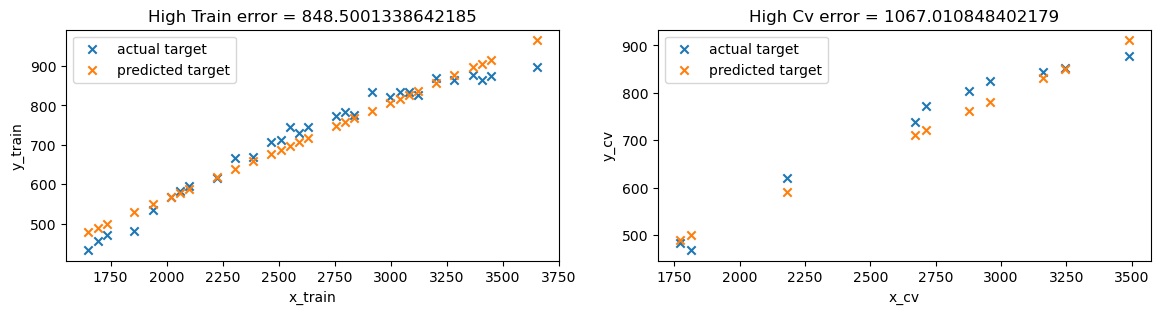

In [26]:
bias_degree=np.argmax(x_train_mses)+1
x_train_mse=x_train_mses[bias_degree-1]
x_cv_mse=x_cv_mses[bias_degree-1]
print(f'High Bias model with degree = {bias_degree} : high train error = {x_train_mse} and high cv error = {x_cv_mse}')

bias_model=models[bias_degree-1]
y_pred_train=transform_and_predict(x_train,bias_degree,bias_model)
y_pred_cv=transform_and_predict(x_cv,bias_degree,bias_model)

plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plot_xy(x_train,y_train,y_pred_train,'x_train','y_train',f'High Train error = {x_train_mse}')
plt.subplot(1,2,2)
plot_xy(x_cv,y_cv,y_pred_cv,'x_cv','y_cv',f'High Cv error = {x_cv_mse}')

In [27]:
#choosing model with high variance problem using train set

High Variance model with degree = 8 : low train error = 105.5651542423774 and high cv error = 434.9693838416342


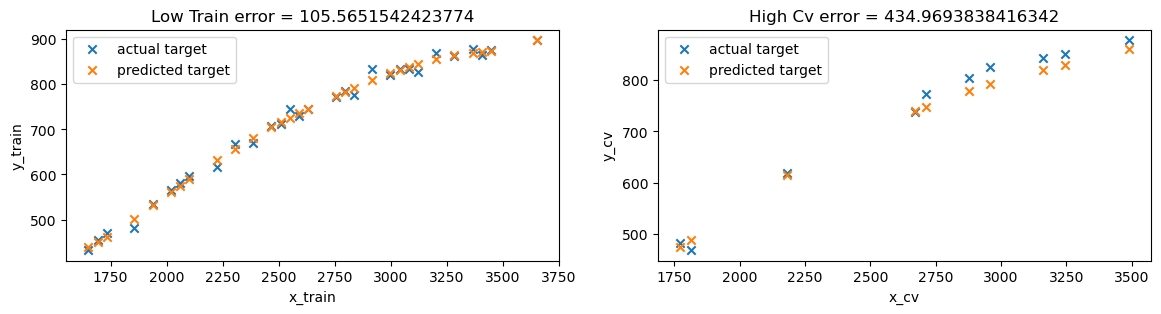

In [28]:
variance_degree=np.argmin(x_train_mses)+1
x_train_mse=x_train_mses[variance_degree-1]
x_cv_mse=x_cv_mses[variance_degree-1]
print(f'High Variance model with degree = {variance_degree} : low train error = {x_train_mse} and high cv error = {x_cv_mse}')

variance_model=models[variance_degree-1]
y_pred_train=transform_and_predict(x_train,variance_degree,variance_model)
y_pred_cv=transform_and_predict(x_cv,variance_degree,variance_model)

plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plot_xy(x_train,y_train,y_pred_train,'x_train','y_train',f'Low Train error = {x_train_mse}')
plt.subplot(1,2,2)
plot_xy(x_cv,y_cv,y_pred_cv,'x_cv','y_cv',f'High Cv error = {x_cv_mse}')

In [29]:
#find best nn architecture using cross validation set among 3 models

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE

In [31]:
x_train_scaled=transform_x(x_train,degree=1)
x_cv_scaled=transform_x(x_cv,degree=1)

In [32]:
model1=Sequential([Dense(units=25,activation='relu'),
                  Dense(units=15,activation='relu'),
                  Dense(units=1,activation='linear')])
model2=Sequential([Dense(units=20,activation='relu'),
                  Dense(units=12,activation='relu'),
                  Dense(units=12,activation='relu'),
                  Dense(units=20,activation='relu'),
                  Dense(units=1,activation='linear')])
model3=Sequential([Dense(units=32,activation='relu'),
                  Dense(units=16,activation='relu'),
                  Dense(units=8,activation='relu'),
                  Dense(units=4,activation='relu'),
                  Dense(units=12,activation='relu'),
                  Dense(units=1,activation='linear')])
models_nn=[model1,model2,model3]

In [33]:
x_nn_train_mses=[]
x_nn_cv_mses=[]
for model in models_nn:
    model.compile(loss=MSE,optimizer=Adam(learning_rate=0.1))
    model.fit(x_train_scaled,y_train,epochs=300,verbose=0)
    
    y_pred_train=model.predict(x_train_scaled)
    x_nn_train_mse=mse(y_train,y_pred_train)
    
    y_pred_cv=model.predict(x_cv_scaled)
    x_nn_cv_mse=mse(y_cv,y_pred_cv)
    
    x_nn_train_mses.append(x_nn_train_mse)
    x_nn_cv_mses.append(x_nn_cv_mse)

1/1 [==============================] - 0s 12ms/step


In [34]:
#choosing best nn architecture by lowest cv error

In [35]:
for i in range(3):
    print(f'model {i+1}:train_mse = {x_nn_train_mses[i]},cv_mse = {x_nn_cv_mses[i]}')

model 1:train_mse = 142.09829976030562,cv_mse = 282.58560827176177
model 2:train_mse = 848.4997432064516,cv_mse = 1067.0109271250808
model 3:train_mse = 143.5980012881223,cv_mse = 298.1011934479805


In [36]:
#choosing best nn model by lowest cv erorr and predict on test

best model - 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                50        
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 10ms/step
train MSE = 142.09829976030562
cv MSE = 282.58560827176177
test MSE = 310.7743897144502


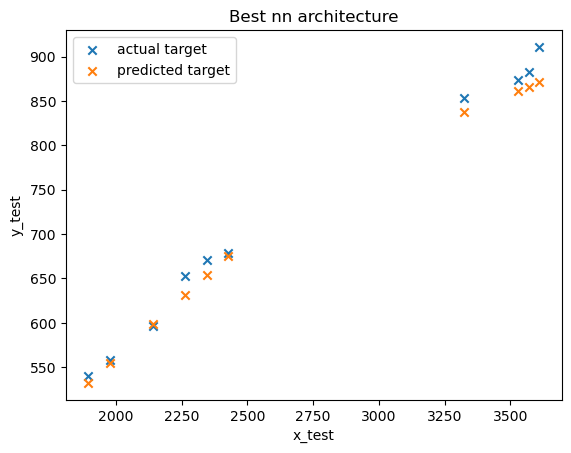

In [37]:
index=np.argmin(x_nn_cv_mses)+1
print(f'best model - {index}')

x_test_scaled=transform_x(x_test,degree=1)
model_nn=models_nn[index-1]
print(model_nn.summary())

y_pred=model_nn.predict(x_test_scaled)
x_train_mse=x_nn_train_mses[index-1]
x_cv_mse=x_nn_cv_mses[index-1]
x_test_mse=mse(y_test,y_pred)


print(f'train MSE = {x_train_mse}')
print(f'cv MSE = {x_cv_mse}')
print(f'test MSE = {x_test_mse}')

plot_xy(x_test,y_test,y_pred,'x_test','y_test','Best nn architecture')